# WeatherPy
----

### Analysis
- The max temperature of a city higher when it is close to the equator and it decreases when it is further away from the equator on either side.
- A high humidity percentage is more common among all of latitudes.
- Majority of the cities have a wind speed of less than 20 mph.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
print('Beginning Data Retrieval')
record = 1
set_num = 1
base_url = "http://api.openweathermap.org/data/2.5/weather?"

cities_data = {'City':[], 'Cloudiness':[], 'Country':[], 'Date':[], 'Humidity':[], 'Lat':[],
               'Lng': [], 'Max Temp':[], 'Wind Speed':[]}

for city in cities:
    try:
        print(f"Processing Record {record} of Set {set_num} | {city}")
        
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        params = {
            'appid':api_key,
            'q':city,
            'units':'imperial'
        }
        
        city_data = requests.get(base_url, params).json()
        
        cloudiness = city_data['clouds']['all']
        country = city_data['sys']['country']
        date = city_data['dt']
        humidity = city_data['main']['humidity']
        lat = city_data['coord']['lat']
        lng = city_data['coord']['lon']
        max_temp = city_data['main']['temp_max']
        wind_speed = city_data['wind']['speed']
        
        cities_data['City'].append(city)
        cities_data['Cloudiness'].append(cloudiness)
        cities_data['Country'].append(country)
        cities_data['Date'].append(date)
        cities_data['Humidity'].append(humidity)
        cities_data['Lat'].append(lat)
        cities_data['Lng'].append(lng)
        cities_data['Max Temp'].append(max_temp)
        cities_data['Wind Speed'].append(wind_speed)
        
        time.sleep(1)
    except:
        print('City not found. Skipping...')
        
    if record < 50:
        record += 1
    else:
        record = 1
        set_num += 1


Beginning Data Retrieval
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | aswan
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | powell river
Processing Record 11 of Set 1 | barstow
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | santa marta
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | muisne
Processing Record 20 of Set 1 | northam
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | khatanga
Processing Reco

Processing Record 37 of Set 4 | sinnamary
Processing Record 38 of Set 4 | nalgonda
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | serebryansk
Processing Record 46 of Set 4 | noumea
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | berlevag
Processing Record 4 of Set 5 | yeppoon
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | lang suan
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of 

Processing Record 23 of Set 8 | gushikawa
Processing Record 24 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 25 of Set 8 | izhma
Processing Record 26 of Set 8 | okhotsk
Processing Record 27 of Set 8 | udachnyy
Processing Record 28 of Set 8 | chegdomyn
Processing Record 29 of Set 8 | namibe
Processing Record 30 of Set 8 | bethanien
Processing Record 31 of Set 8 | skibbereen
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | kosum phisai
Processing Record 34 of Set 8 | byron bay
Processing Record 35 of Set 8 | idlib
Processing Record 36 of Set 8 | saldanha
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | navrongo
Processing Record 40 of Set 8 | quelimane
Processing Record 41 of Set 8 | maniitsoq
Processing Record 42 of Set 8 | fukue
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | nkowakowa
Processing Record 45 of Set 8 | clinton
Processing Record 46 of Set 8 | shc

Processing Record 7 of Set 12 | kargopol
Processing Record 8 of Set 12 | reitz
Processing Record 9 of Set 12 | atok
Processing Record 10 of Set 12 | sungairaya
Processing Record 11 of Set 12 | samarai
Processing Record 12 of Set 12 | uspenskoye
Processing Record 13 of Set 12 | urbino
Processing Record 14 of Set 12 | aktau
Processing Record 15 of Set 12 | caravelas
Processing Record 16 of Set 12 | sechura
Processing Record 17 of Set 12 | sibolga
Processing Record 18 of Set 12 | jonkoping
Processing Record 19 of Set 12 | saint-leu
Processing Record 20 of Set 12 | nahavand
Processing Record 21 of Set 12 | yumen
Processing Record 22 of Set 12 | kupang
Processing Record 23 of Set 12 | sao pedro do sul
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | losal
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | lolua
City not found. Skipping...
Processing Record 28 of Set 12 | yeniseysk
Processing Record 29 of Set 12 | aitape
Processing Record 30 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_df = pd.DataFrame(cities_data)
city_df.to_csv(output_data_file, index=False)
city_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [18]:
city_df = pd.read_csv(output_data_file)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,64,NZ,1554327009,88,-46.19,168.86,52.00,14.67
1,aswan,0,EG,1554321600,26,24.09,32.90,78.80,10.29
2,castro,90,CL,1554325200,100,-42.48,-73.76,50.00,11.41
3,lorengau,64,PG,1554327073,100,-2.02,147.27,80.82,8.75
4,bluff,0,AU,1554327074,81,-23.58,149.07,65.88,11.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

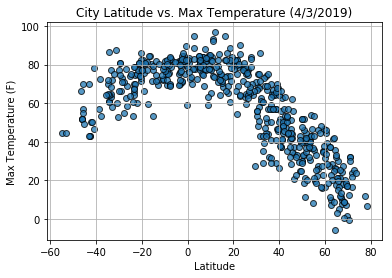

In [46]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], edgecolors='black', alpha=.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (4/3/2019)')
plt.savefig('images/lat_vs_temperature.png')

#### Latitude vs. Humidity Plot

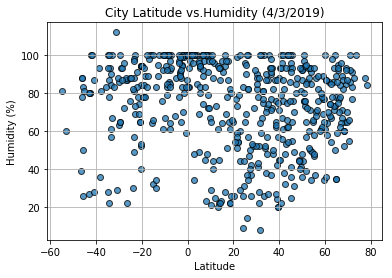

In [47]:
plt.scatter(city_df['Lat'], city_df['Humidity'], edgecolors='black', alpha=.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs.Humidity (4/3/2019)')
plt.savefig('images/lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

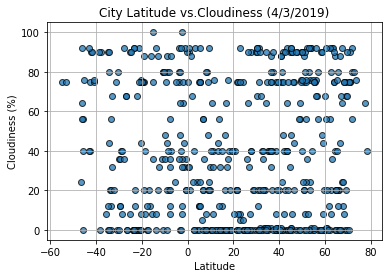

In [48]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'], edgecolors='black', alpha=.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs.Cloudiness (4/3/2019)')
plt.savefig('images/lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

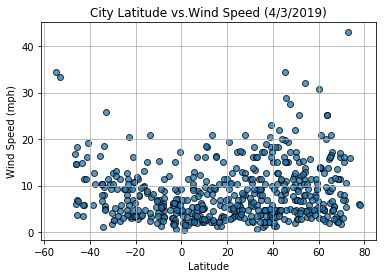

In [49]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], edgecolors='black', alpha=.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs.Wind Speed (4/3/2019)')
plt.savefig('images/lat_vs_wind_speed.png')